In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
bank_data=pd.read_csv('bank-Full.csv')

In [67]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [68]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
print("shape:",bank_data.shape)
print("............................")
print("info:",bank_data.info())
print(".............................")
print(bank_data.describe())
print(".............................")
print("missing values:",bank_data.isnull().sum())

shape: (45211, 17)
............................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB
info: None
.............................
          

## Data visualization

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anacond

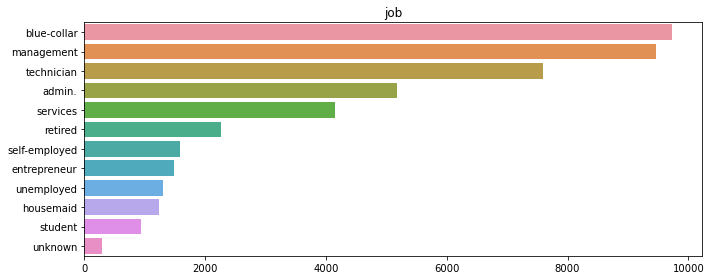

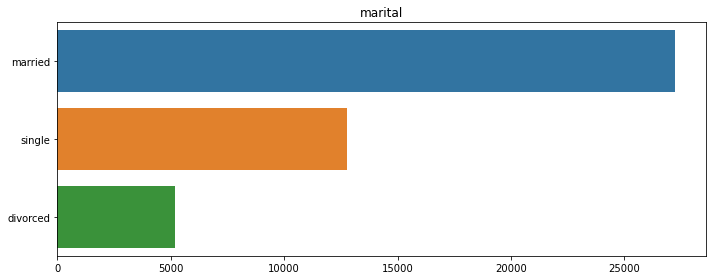

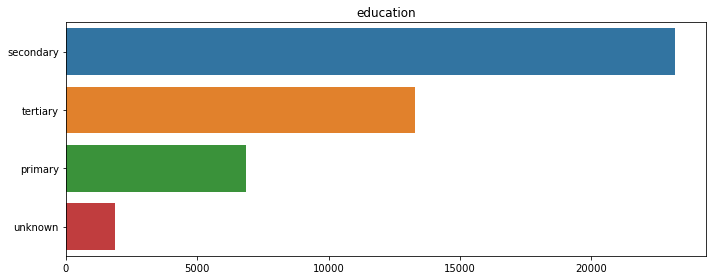

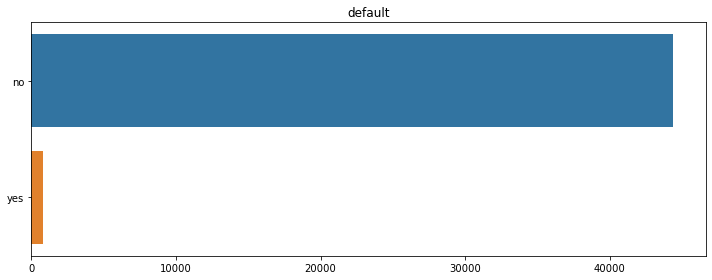

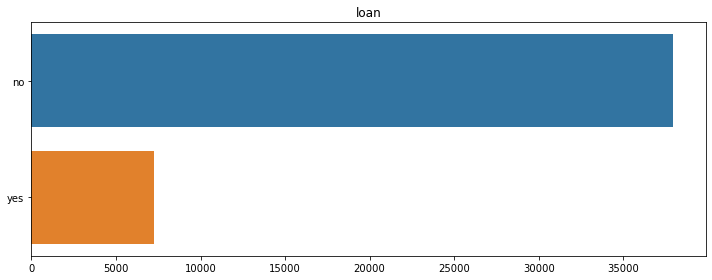

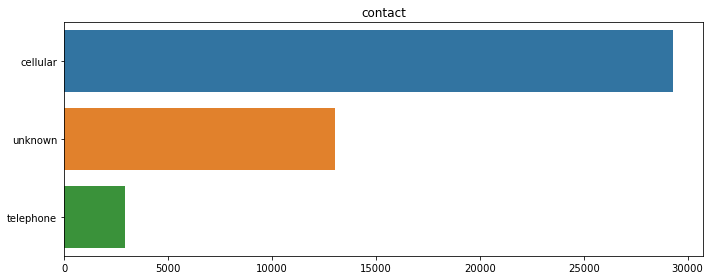

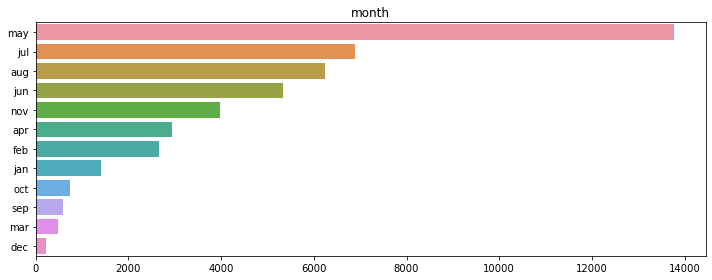

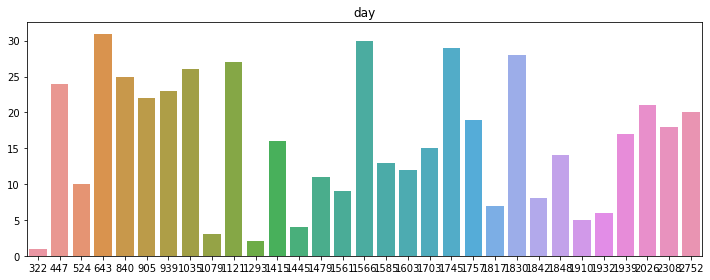

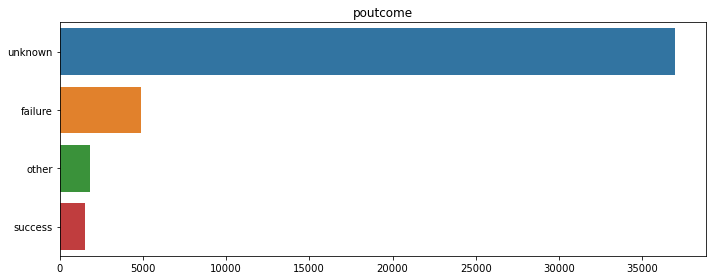

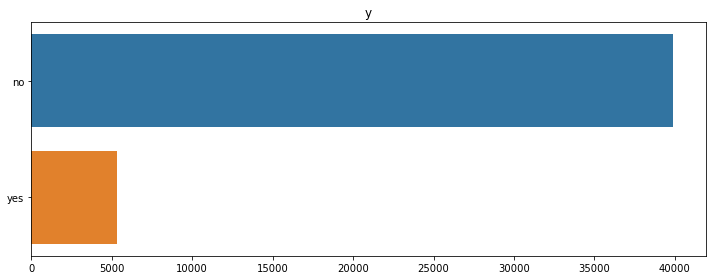

In [70]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank_data[col].value_counts().values,bank_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

### Correlation Matrix of the numerical features


In [71]:
# TO Convert target variable into numeric
bank_data.y = bank_data.y.map({'no':0, 'yes':1})

In [72]:
bank_data.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

Text(0.5, 1.05, 'Pearson correlation of Features')

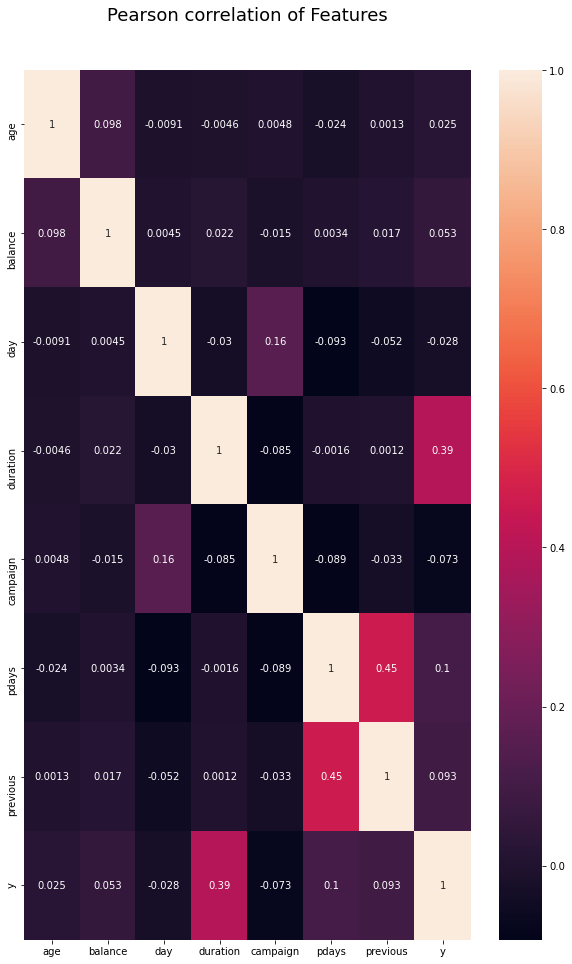

In [73]:
import seaborn as sns
corr = bank_data.corr()

f, ax = plt.subplots(figsize=(10,16))

sns.heatmap(corr, ax=ax, annot=True)

plt.title("Pearson correlation of Features", y=1.05, size=18)

 ### There is no variable highly correlated to y.



In [74]:
#To drop marital and contact columns
bank_data.drop(['marital'],axis=1, inplace=True)
bank_data.drop(['contact'],axis=1, inplace=True)
bank_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [44]:
### For changing categorical variable to numerical variable.


In [75]:
bank_data[['default','housing','loan']]=bank_data[['default','housing','loan']].replace({"yes":1,"no":0})
bank_data['month']=bank_data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
bank_data['job']=bank_data['job'].replace(['unknown'],['other'])
bank_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_data['job']=le.fit_transform(bank_data['job'])
bank_data['education']=le.fit_transform(bank_data['education'])
bank_data['poutcome']=le.fit_transform(bank_data['poutcome'])

In [77]:
bank_data.head(15)

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0
5,35,4,2,0,231,1,0,5,5,139,1,-1,0,3,0
6,28,4,2,0,447,1,1,5,5,217,1,-1,0,3,0
7,42,2,2,1,2,1,0,5,5,380,1,-1,0,3,0
8,58,6,0,0,121,1,0,5,5,50,1,-1,0,3,0
9,43,10,1,0,593,1,0,5,5,55,1,-1,0,3,0


## Outliers

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


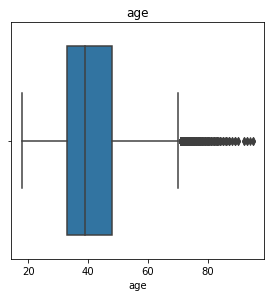

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


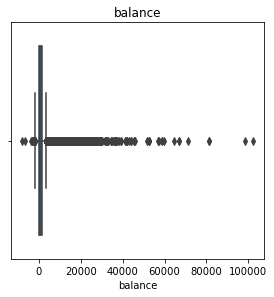

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


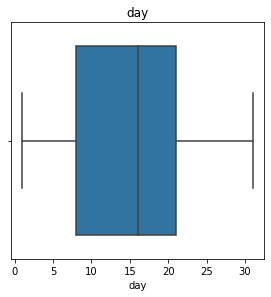

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


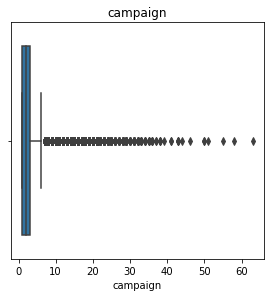

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


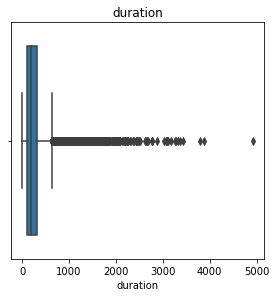

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


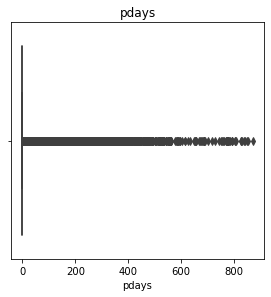

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


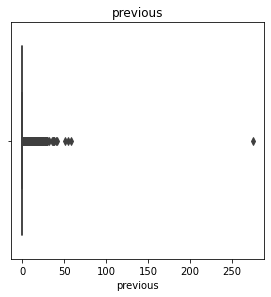

In [78]:
col=bank_data[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(10,20))
  plt.subplot(4,2,2)
  sns.boxplot(bank_data[i])
  plt.title(i)
  plt.show()
  n=n+1

### to remove outliers using z_score



In [79]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bank_data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
bank_data=bank_data[(z<3).all(axis=1)]
bank_data.shape

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


(40209, 15)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


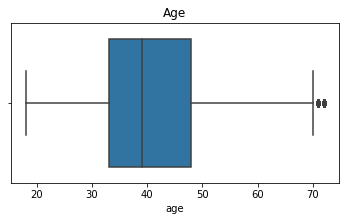

In [80]:
## To check outliers removed Or not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(bank_data['age'])
plt.title("Age")
plt.show()

## Seperation of independent varible and dependent variable

In [81]:
x=bank_data.drop(['y'],axis=1) #contain all  independent variable
y=bank_data['y']           #dependent variable
bank_data['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

In [58]:
## To handle inbalanced data

<AxesSubplot:xlabel='y', ylabel='count'>

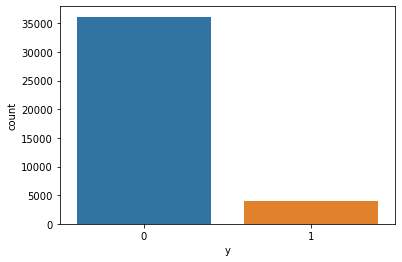

In [82]:
sns.countplot(x='y',data=bank_data)

#### if observation of one class is higher than the observation of other class then there exists a class imbalance. So,we can clearly see that there is a huge difference between the data set. Solving this issue we  use resampling technique.

## Random Over-Sampling

In [83]:
!pip install imblearn



In [85]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

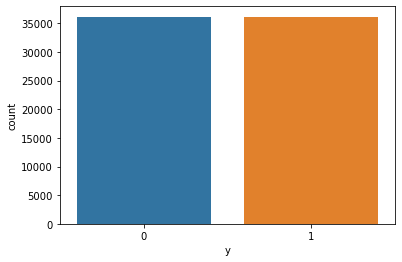

In [86]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(57848, 14) (14462, 14) (57848,) (14462,)


## Logistic regression

ROC_AUC Score: 0.7888999786395734
[[5794 1353]
 [1709 5606]]


<AxesSubplot:>

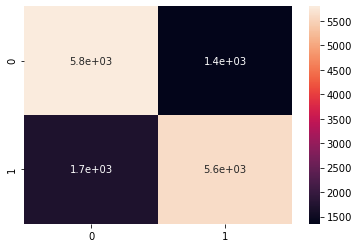

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

### RandomForest- Classifier

ROC_AUC Score: 0.9769596691153505
[[6801  346]
 [   6 7309]]


<AxesSubplot:>

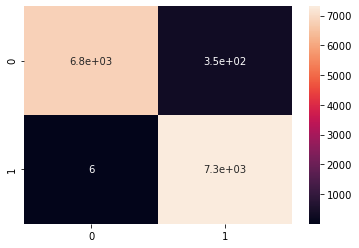

In [90]:
# for randomForest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)

AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(ytest,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

In [91]:
print(classification_report(y_pred,ytest))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6807
           1       1.00      0.95      0.98      7655

    accuracy                           0.98     14462
   macro avg       0.98      0.98      0.98     14462
weighted avg       0.98      0.98      0.98     14462



## KNeighbors Classifier


In [92]:
#KNeighbors Classifier

ROC_AUC Score: 0.934407294587101
[[6137   56]
 [1010 7259]]


<AxesSubplot:>

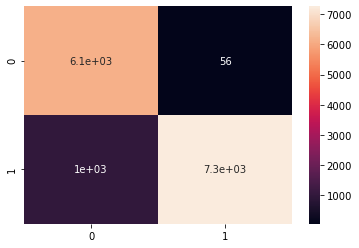

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y_predict = knn.predict(xtest)

acc_knn=accuracy_score(ytest,y_predict)
recall_knn=recall_score(ytest,y_predict)
precision_knn=precision_score(ytest,y_predict)
f1score_knn=f1_score(ytest,y_predict)

AUC_KN=roc_auc_score(y_predict,ytest)
print("ROC_AUC Score:",AUC_KN)
cm=confusion_matrix(y_predict,ytest)
print(cm)

sns.heatmap(cm,annot=True)

In [94]:
print(classification_report(y_predict,ytest))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6193
           1       0.99      0.88      0.93      8269

    accuracy                           0.93     14462
   macro avg       0.93      0.93      0.93     14462
weighted avg       0.94      0.93      0.93     14462



## For Best model

In [96]:
IND=['Logistic regression','Randomforest','KNeighbors']
data={"Accuracy":[acc_lr,acc_rf,acc_knn],"Recall":[recall_lr,recall_rf,recall_knn],"Precision":[precision_lr,precision_rf,precision_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN]}
result=pd.DataFrame(data=data,index=IND)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.788273,0.766370,0.805576,0.785484,0.788900
Randomforest,0.975660,0.999180,0.954801,0.976486,0.976960
KNeighbors,0.926290,0.992344,0.877857,0.931597,0.934407


In [ ]:
#The model with highest roc_auc_acore is consider as a mest model. From above 3 model RandomForest Classifier have highest roc_auc_score 0.9766903176727859.